# Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Data Explorations

In [3]:
df= pd.read_csv(r"C:\Users\Lenovo\analyst_pkl\data\combBiodata.csv", sep=';')
df.head(5)

,NAMA,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,NIK,STATUS,LAMA_KERJA,DIVISI,KUALIFIKASI,GOL,LOKASI,TIPE KEAHLIAN,KELAS KEAHLIAN,LEVEL KEAHLIAN,KELAS JABATAN,JABATAN
0,Achmad Fauzi,0.0,2.0,2602.0,350000,Kontrak,3,DSO,S1,B1,Jakarta,Perekayasa,6,Perekayasa Madya,2,STAF LV. 3
1,Adi Pratama,7.0,6.0,8064.0,"8502,013",Tetap,16,DSO,S1,C3,Malang,Perekayasa,2,Pimpinan Muda,1,MANAGER
2,Adinda Azzahra,NaN,NaN,NaN,"9112,046",Tetap,16,DAK,S1,B3,Jakarta,Pelaksana,3,Pelaksana Utama,4,STAF LV. 3
3,Afrilia Fajarwati,NaN,NaN,NaN,221001,Kontrak,1,DAK,S1,B1-MI,Malang,Pelaksana,2,Pelaksana Pemula,2,STAF LV.0
4,Afrizal Aditya,29.0,3.0,56.0,"9301,057",Tetap,9,DIP,S1,B3,Malang,Perekayasa,2,Pimpinan Pemula,7,STAF LV. 3 / ASS. SUPERVISOR


In [4]:
df.shape

(63, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NAMA                  63 non-null     object 
 1   DURATIONS_PERPROJECT  40 non-null     float64
 2   TOTAL_PROJECT         40 non-null     float64
 3   TOTAL_TIME            40 non-null     float64
 4   NIK                   63 non-null     object 
 5   STATUS                63 non-null     object 
 6   LAMA_KERJA            63 non-null     int64  
 7   DIVISI                63 non-null     object 
 8   KUALIFIKASI           63 non-null     object 
 9   GOL                   63 non-null     object 
 10  LOKASI                63 non-null     object 
 11  TIPE KEAHLIAN         63 non-null     object 
 12  KELAS KEAHLIAN        63 non-null     int64  
 13  LEVEL KEAHLIAN        63 non-null     object 
 14  KELAS JABATAN         63 non-null     int64  
 15  JABATAN               63 

# Data Quality Check

In [6]:
df.nunique()

NAMA                    63
DURATIONS_PERPROJECT    19
TOTAL_PROJECT           22
TOTAL_TIME              39
NIK                     63
STATUS                   2
LAMA_KERJA              14
DIVISI                   6
KUALIFIKASI              1
GOL                     17
LOKASI                   3
TIPE KEAHLIAN            2
KELAS KEAHLIAN           7
LEVEL KEAHLIAN          13
KELAS JABATAN            7
JABATAN                 10
dtype: int64

In [7]:
df.isnull().sum()

NAMA                     0
DURATIONS_PERPROJECT    23
TOTAL_PROJECT           23
TOTAL_TIME              23
NIK                      0
STATUS                   0
LAMA_KERJA               0
DIVISI                   0
KUALIFIKASI              0
GOL                      0
LOKASI                   0
TIPE KEAHLIAN            0
KELAS KEAHLIAN           0
LEVEL KEAHLIAN           0
KELAS JABATAN            0
JABATAN                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Null Values & Columns Combination

In [9]:
#since that the data needed is only from PPDB, so we can just drop the non-ppdb (the null values)
df1= df.dropna()
df1.isnull().sum()

NAMA                    0
DURATIONS_PERPROJECT    0
TOTAL_PROJECT           0
TOTAL_TIME              0
NIK                     0
STATUS                  0
LAMA_KERJA              0
DIVISI                  0
KUALIFIKASI             0
GOL                     0
LOKASI                  0
TIPE KEAHLIAN           0
KELAS KEAHLIAN          0
LEVEL KEAHLIAN          0
KELAS JABATAN           0
JABATAN                 0
dtype: int64

In [10]:
df1.nunique()

NAMA                    40
DURATIONS_PERPROJECT    19
TOTAL_PROJECT           22
TOTAL_TIME              39
NIK                     40
STATUS                   2
LAMA_KERJA              12
DIVISI                   6
KUALIFIKASI              1
GOL                     12
LOKASI                   3
TIPE KEAHLIAN            2
KELAS KEAHLIAN           7
LEVEL KEAHLIAN          11
KELAS JABATAN            7
JABATAN                  8
dtype: int64

In [11]:
#combining Kelas Keahlian and Level Keahlian into 1 column
df1['KELAS_KEAHLIAN'] = df1['KELAS KEAHLIAN'].astype(str) + '_ ' + df1['LEVEL KEAHLIAN']
df1=df1.drop(['KELAS KEAHLIAN', 'LEVEL KEAHLIAN'], axis=1)
df1.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23180\4117283715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['KELAS_KEAHLIAN'] = df1['KELAS KEAHLIAN'].astype(str) + '_ ' + df1['LEVEL KEAHLIAN']


,NAMA,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,NIK,STATUS,LAMA_KERJA,DIVISI,KUALIFIKASI,GOL,LOKASI,TIPE KEAHLIAN,KELAS JABATAN,JABATAN,KELAS_KEAHLIAN
0,Achmad Fauzi,0.0,2.0,2602.0,350000,Kontrak,3,DSO,S1,B1,Jakarta,Perekayasa,2,STAF LV. 3,6_ Perekayasa Madya
1,Adi Pratama,7.0,6.0,8064.0,"8502,013",Tetap,16,DSO,S1,C3,Malang,Perekayasa,1,MANAGER,2_ Pimpinan Muda
4,Afrizal Aditya,29.0,3.0,56.0,"9301,057",Tetap,9,DIP,S1,B3,Malang,Perekayasa,7,STAF LV. 3 / ASS. SUPERVISOR,2_ Pimpinan Pemula
5,Ahmad Azhar Mashuri,0.0,51.0,3734.0,"8310,019",Tetap,16,DIP,S1,C3,Malang,Perekayasa,5,MANAGER,2_ Pimpinan Muda
6,Ahmad Nashruddin,1066.0,11.0,14329.0,190101,Tetap,7,DSO,S1,B3-MI,Malang Madani,Perekayasa,5,STAF LV. 3 / ASS. SUPERVISOR,3_ Perekayasa Utama


In [12]:
#combining Kelas Jabatan and Jabatan into 1 column
df1['KELAS_JABATAN'] = df1['KELAS JABATAN'].astype(str) + '_ ' + df1['JABATAN']
df1=df1.drop(['KELAS JABATAN', 'JABATAN', 'NIK'], axis=1)
df1.head()

,NAMA,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,STATUS,LAMA_KERJA,DIVISI,KUALIFIKASI,GOL,LOKASI,TIPE KEAHLIAN,KELAS_KEAHLIAN,KELAS_JABATAN
0,Achmad Fauzi,0.0,2.0,2602.0,Kontrak,3,DSO,S1,B1,Jakarta,Perekayasa,6_ Perekayasa Madya,2_ STAF LV. 3
1,Adi Pratama,7.0,6.0,8064.0,Tetap,16,DSO,S1,C3,Malang,Perekayasa,2_ Pimpinan Muda,1_ MANAGER
4,Afrizal Aditya,29.0,3.0,56.0,Tetap,9,DIP,S1,B3,Malang,Perekayasa,2_ Pimpinan Pemula,7_ STAF LV. 3 / ASS. SUPERVISOR
5,Ahmad Azhar Mashuri,0.0,51.0,3734.0,Tetap,16,DIP,S1,C3,Malang,Perekayasa,2_ Pimpinan Muda,5_ MANAGER
6,Ahmad Nashruddin,1066.0,11.0,14329.0,Tetap,7,DSO,S1,B3-MI,Malang Madani,Perekayasa,3_ Perekayasa Utama,5_ STAF LV. 3 / ASS. SUPERVISOR


## Data Corr & Visualization

<Axes: >

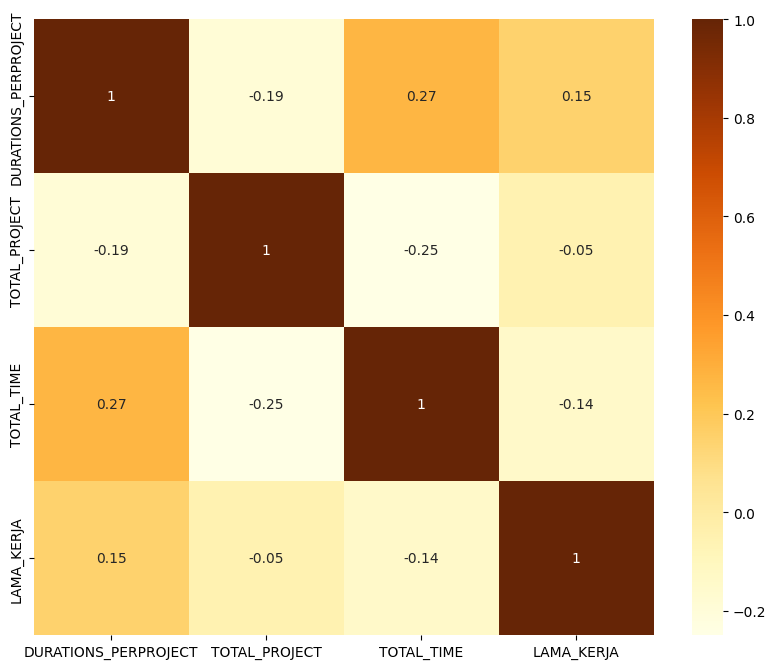

In [13]:
#seperating numerical from categorical data
df1n= df1[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'TOTAL_TIME', 'LAMA_KERJA']]
#correlation on numerical data
correl = df1n.corr().round(2)
plt.figure(figsize = (10,8))
sns.heatmap(correl, annot = True, cmap = 'YlOrBr')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23180\3923655740.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAMA', palette='Set2', data=df1c)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23180\3923655740.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATUS', palette='Set2', data=df1c)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23180\3923655740.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DIVISI', palette='Set2', data=df1c)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23180\3923655740.py:12: FutureWarning:

<Axes: xlabel='KELAS_JABATAN', ylabel='count'>

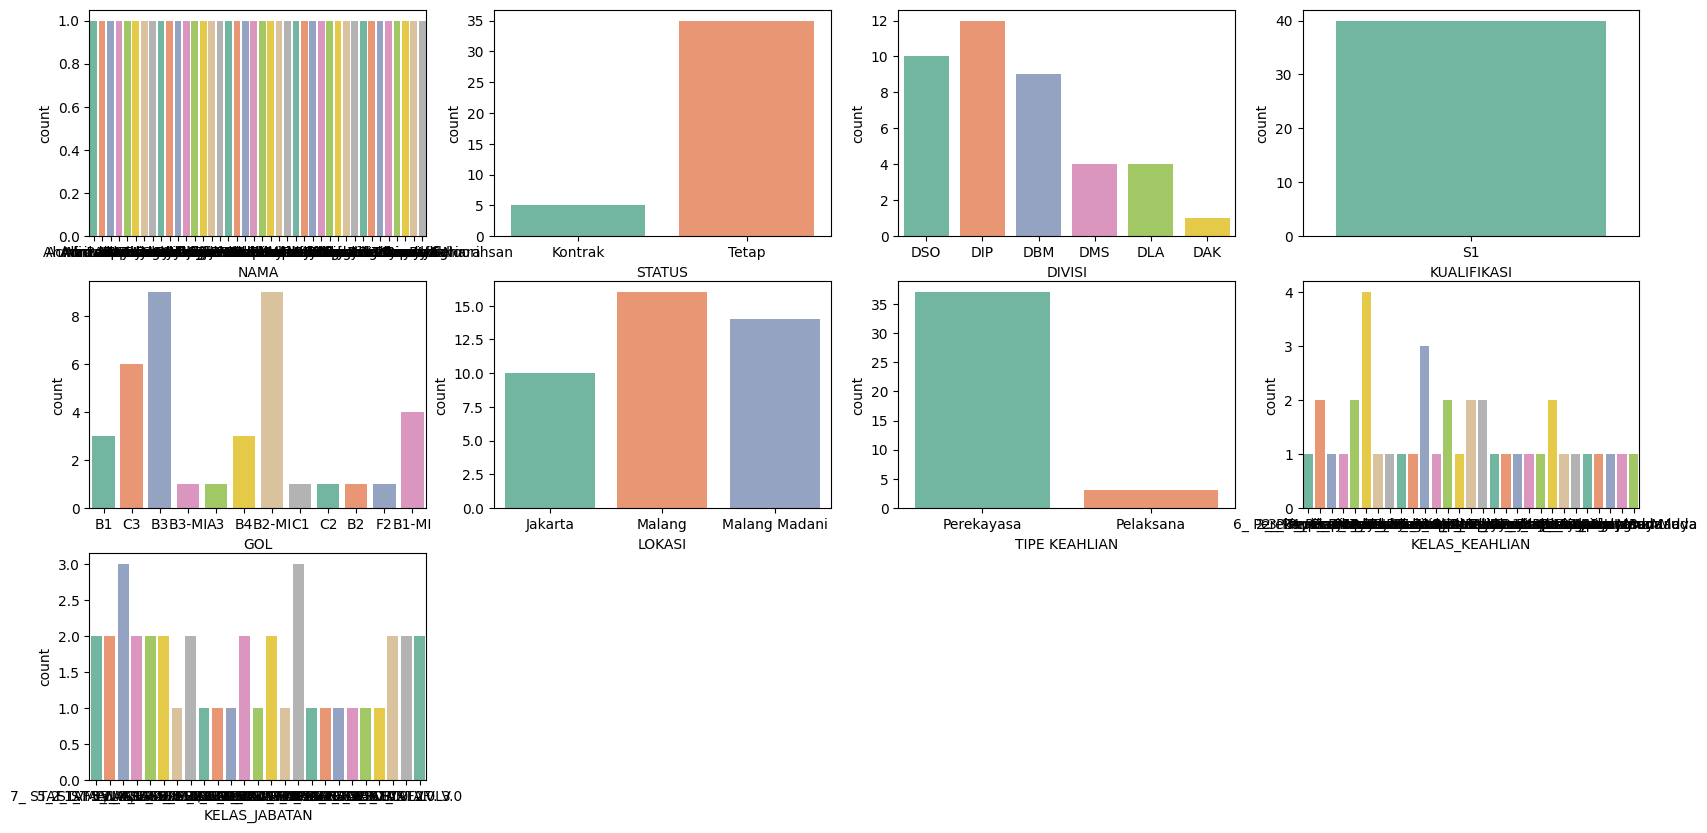

In [14]:
#seperating categorical from numerical data
df1c= df1[['NAMA', 'STATUS', 'DIVISI', 'KUALIFIKASI', 'GOL', 'LOKASI', 'TIPE KEAHLIAN', 'KELAS_KEAHLIAN', 'KELAS_JABATAN']]
#correlation on categorical data
plt.figure(figsize = (20,10))
plt.subplot(3, 4, 1)
sns.countplot(x='NAMA', palette='Set2', data=df1c)
plt.subplot(3, 4, 2)
sns.countplot(x='STATUS', palette='Set2', data=df1c)
plt.subplot(3, 4, 3)
sns.countplot(x='DIVISI', palette='Set2', data=df1c)
plt.subplot(3, 4, 4)
sns.countplot(x='KUALIFIKASI', palette='Set2', data=df1c)
plt.subplot(3, 4, 5)
sns.countplot(x='GOL', palette='Set2', data=df1c)
plt.subplot(3, 4, 6)
sns.countplot(x='LOKASI', palette='Set2', data=df1c)
plt.subplot(3, 4, 7)
sns.countplot(x='TIPE KEAHLIAN', palette='Set2', data=df1c)
plt.subplot(3, 4, 8)
sns.countplot(x='KELAS_KEAHLIAN', palette='Set2', data=df1c)
plt.subplot(3, 4, 9)
sns.countplot(x='KELAS_JABATAN', palette='Set2', data=df1c)

# Data Prep

## TIPE KEAHLIAN Attributes

In [15]:
#dropping the other attributes and NAMA
dfa1= df1.drop(['KELAS_KEAHLIAN', 'KELAS_JABATAN', 'NAMA', 'KUALIFIKASI'], axis=1)
dfa1.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,TIPE KEAHLIAN
0,0.0,2.0,2602.0,Kontrak,3,DSO,B1,Jakarta,Perekayasa
1,7.0,6.0,8064.0,Tetap,16,DSO,C3,Malang,Perekayasa
4,29.0,3.0,56.0,Tetap,9,DIP,B3,Malang,Perekayasa
5,0.0,51.0,3734.0,Tetap,16,DIP,C3,Malang,Perekayasa
6,1066.0,11.0,14329.0,Tetap,7,DSO,B3-MI,Malang Madani,Perekayasa


### Feature Selection

In [16]:
#data feature selection
X= dfa1.drop(['TIPE KEAHLIAN'], axis=1)
y= dfa1['TIPE KEAHLIAN']

In [17]:
y.shape

(40,)

In [18]:
X.shape

(40, 8)

In [19]:
X.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI
0,0.0,2.0,2602.0,Kontrak,3,DSO,B1,Jakarta
1,7.0,6.0,8064.0,Tetap,16,DSO,C3,Malang
4,29.0,3.0,56.0,Tetap,9,DIP,B3,Malang
5,0.0,51.0,3734.0,Tetap,16,DIP,C3,Malang
6,1066.0,11.0,14329.0,Tetap,7,DSO,B3-MI,Malang Madani


### Categorical Datas

In [20]:
X.dtypes

DURATIONS_PERPROJECT    float64
TOTAL_PROJECT           float64
TOTAL_TIME              float64
STATUS                   object
LAMA_KERJA                int64
DIVISI                   object
GOL                      object
LOKASI                   object
dtype: object

In [21]:
#objt(str) to category
X['STATUS'] = X['STATUS'].astype('category')
X['DIVISI'] = X['DIVISI'].astype('category')
X['GOL'] = X['GOL'].astype('category')
X['LOKASI'] = X['LOKASI'].astype('category')

In [22]:
X.dtypes

DURATIONS_PERPROJECT     float64
TOTAL_PROJECT            float64
TOTAL_TIME               float64
STATUS                  category
LAMA_KERJA                 int64
DIVISI                  category
GOL                     category
LOKASI                  category
dtype: object

In [23]:
X.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI
0,0.0,2.0,2602.0,Kontrak,3,DSO,B1,Jakarta
1,7.0,6.0,8064.0,Tetap,16,DSO,C3,Malang
4,29.0,3.0,56.0,Tetap,9,DIP,B3,Malang
5,0.0,51.0,3734.0,Tetap,16,DIP,C3,Malang
6,1066.0,11.0,14329.0,Tetap,7,DSO,B3-MI,Malang Madani


In [24]:
X.shape

(40, 8)

In [25]:
X.nunique()

DURATIONS_PERPROJECT    19
TOTAL_PROJECT           22
TOTAL_TIME              39
STATUS                   2
LAMA_KERJA              12
DIVISI                   6
GOL                     12
LOKASI                   3
dtype: int64

In [26]:
categorical_columns = ['STATUS', 'DIVISI', 'GOL', 'LOKASI']
encoder = OneHotEncoder(sparse_output=False)
encoded_cols = encoder.fit_transform(X[categorical_columns])

In [27]:
# Get the column names for the encoded columns
encoded_col_names = encoder.get_feature_names_out(categorical_columns)

In [28]:
# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoded_col_names)

In [29]:
# Drop the original categorical columns
X = X.drop(categorical_columns, axis=1)

In [30]:
#reset indices
X = X.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

In [31]:
# Concatenate the DataFrame with the encoded columns
X = pd.concat([X, encoded_df], axis=1)

In [32]:
X

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,...,GOL_B3,GOL_B3-MI,GOL_B4,GOL_C1,GOL_C2,GOL_C3,GOL_F2,LOKASI_Jakarta,LOKASI_Malang,LOKASI_Malang Madani
0,0.0,2.0,2602.0,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.0,6.0,8064.0,16,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,29.0,3.0,56.0,9,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,51.0,3734.0,16,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1066.0,11.0,14329.0,7,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,17.0,1.0,17.0,11,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,6.0,2043.0,8,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,3.0,9.0,407.0,15,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,757.0,2.0,2775.0,14,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,6.0,9.0,3051.0,8,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Train-test split

In [33]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100)

In [34]:
X_train.shape

(32, 27)

In [35]:
X_test.shape

(8, 27)

### X_train preprocess

In [36]:
X_train.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,...,GOL_B3,GOL_B3-MI,GOL_B4,GOL_C1,GOL_C2,GOL_C3,GOL_F2,LOKASI_Jakarta,LOKASI_Malang,LOKASI_Malang Madani
28,45.0,3.0,20700.0,3,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,3.0,9.0,407.0,15,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,23.0,28.0,468.0,4,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36,3.0,3.0,2352.0,16,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22,52.0,5.0,7052.0,11,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
X_trainN= X_train[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'TOTAL_TIME', 'LAMA_KERJA']]

In [38]:
X_trainN.shape

(32, 4)

#### X_train normalization

In [39]:
#X_train normalization
scaler = MinMaxScaler()
X_trainN_normalized = scaler.fit_transform(X_trainN)
X_trainN_normalized = pd.DataFrame(X_trainN_normalized, columns=['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'TOTAL_TIME', 'LAMA_KERJA'])
X_trainN_normalized = X_trainN_normalized.round(2)
X_trainN_normalized.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA
0,0.04,0.04,1.00,0.13
1,0.00,0.16,0.02,0.93
2,0.02,0.54,0.02,0.20
3,0.00,0.04,0.11,1.00
4,0.05,0.08,0.34,0.67


#### X_train outliers

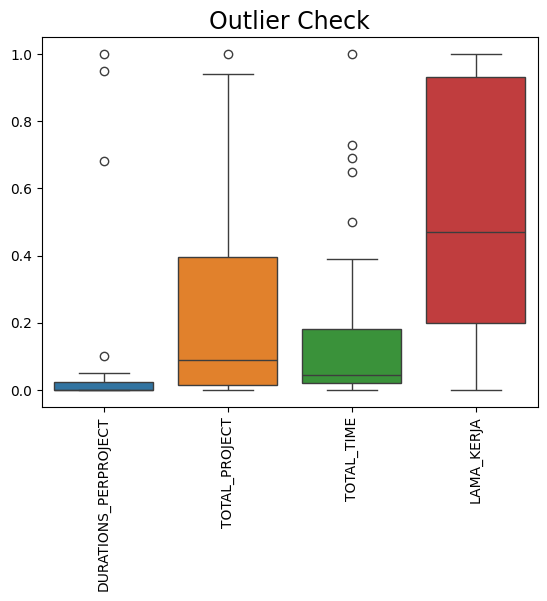

In [40]:
#X_train outliers
sns.boxplot(X_trainN_normalized)
plt.title("Outlier Check", size = 17)
plt.xticks(rotation = 90)
plt.show()

#### Handling outliers

##### DURATIONS_PERPROJECT

In [41]:
#handling outliers w IQR [DURATIONS]
q1= X_trainN_normalized['DURATIONS_PERPROJECT'].quantile(0.25)
q3= X_trainN_normalized['DURATIONS_PERPROJECT'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.0, 0.0225, 0.0225)

In [42]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.011250000000000003, 0.05625)

In [43]:
# find the outliers of df
X_trainN_normalized.loc[(X_trainN_normalized['DURATIONS_PERPROJECT'] > upper_limit) | (X_trainN_normalized['DURATIONS_PERPROJECT'] < lower_limit)]

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA
16,0.95,0.20,0.69,0.40
19,1.00,0.00,0.05,0.93
30,0.10,0.00,0.02,1.00
31,0.68,0.02,0.13,0.87


In [44]:
#trimming
X_train_nD= X_trainN_normalized.loc[(X_trainN_normalized['DURATIONS_PERPROJECT'] < upper_limit) & (X_trainN_normalized['DURATIONS_PERPROJECT'] > lower_limit)]
print('before removing outliers:', len(X_trainN_normalized))
print('after removing outliers:', len(X_train_nD))
print('outliers:', len(X_trainN_normalized) - len(X_train_nD))

before removing outliers: 32
after removing outliers: 28
outliers: 4


In [45]:
X_train_nD.shape

(28, 4)

<Axes: ylabel='DURATIONS_PERPROJECT'>

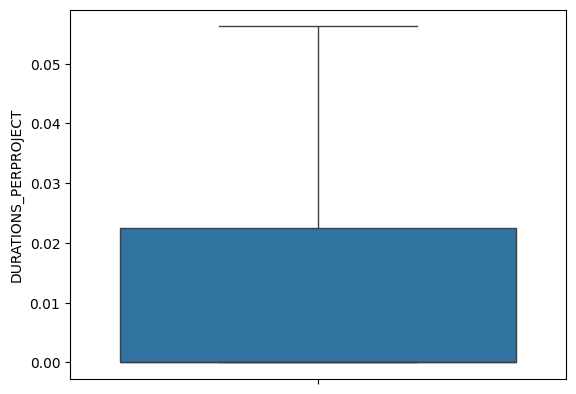

In [46]:
#capping: changing the outlier values to upper/lower limit values
X_train_nD = X_trainN_normalized.copy()
X_train_nD.loc[X_train_nD['DURATIONS_PERPROJECT'] > upper_limit, 'DURATIONS_PERPROJECT'] = upper_limit
X_train_nD.loc[X_train_nD['DURATIONS_PERPROJECT'] < lower_limit, 'DURATIONS_PERPROJECT'] = lower_limit
sns.boxplot(X_train_nD['DURATIONS_PERPROJECT'])

In [47]:
X_train_nD.shape

(32, 4)

In [48]:
X_train_nD= X_train_nD.drop(['TOTAL_PROJECT', 'TOTAL_TIME', 'LAMA_KERJA'], axis=1)
X_train_nD.shape

(32, 1)

In [49]:
X_train_nD.head().round(2)

,DURATIONS_PERPROJECT
0,0.04
1,0.00
2,0.02
3,0.00
4,0.05


##### TOTAL_PROJECT

In [50]:
#handling outliers w IQR [TOTAL_PROJECT]
q1= X_trainN_normalized['TOTAL_PROJECT'].quantile(0.25)
q3= X_trainN_normalized['TOTAL_PROJECT'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.015, 0.395, 0.38)

In [51]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.17500000000000004, 0.9650000000000001)

In [52]:
# find the outliers of df
X_trainN_normalized.loc[(X_trainN_normalized['TOTAL_PROJECT'] > upper_limit) | (X_trainN_normalized['TOTAL_PROJECT'] < lower_limit)]

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA
29,0.0,1.0,0.18,1.0


In [53]:
#trimming
X_train_nP= X_trainN_normalized.loc[(X_trainN_normalized['TOTAL_PROJECT'] < upper_limit) & (X_trainN_normalized['TOTAL_PROJECT'] > lower_limit)]
print('before removing outliers:', len(X_trainN_normalized))
print('after removing outliers:', len(X_train_nD))
print('outliers:', len(X_trainN_normalized) - len(X_train_nP))

before removing outliers: 32
after removing outliers: 32
outliers: 1


<Axes: ylabel='TOTAL_PROJECT'>

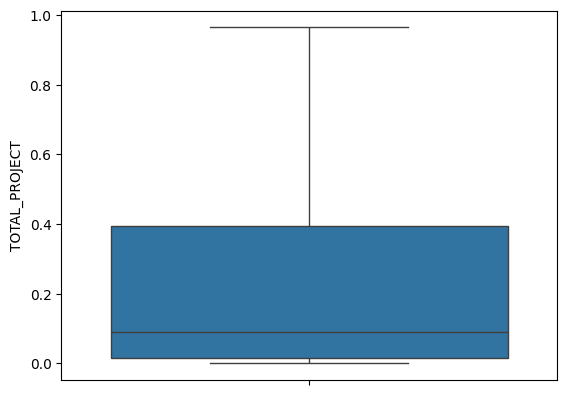

In [54]:
#capping: changing the outlier values to upper/lower limit values
X_train_nP = X_trainN_normalized.copy()
X_train_nP.loc[X_train_nP['TOTAL_PROJECT'] > upper_limit, 'TOTAL_PROJECT'] = upper_limit
X_train_nP.loc[X_train_nP['TOTAL_PROJECT'] < lower_limit, 'TOTAL_PROJECT'] = lower_limit
sns.boxplot(X_train_nP['TOTAL_PROJECT'])

In [55]:
X_train_nP.shape

(32, 4)

In [56]:
X_train_nP= X_train_nP.drop(['DURATIONS_PERPROJECT', 'TOTAL_TIME', 'LAMA_KERJA'], axis=1)
X_train_nP.shape

(32, 1)

In [57]:
X_train_nP.head().round(2)

,TOTAL_PROJECT
0,0.04
1,0.16
2,0.54
3,0.04
4,0.08


##### TOTAL_TIME

In [58]:
q1= X_trainN_normalized['TOTAL_TIME'].quantile(0.25)
q3= X_trainN_normalized['TOTAL_TIME'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.02, 0.18, 0.16)

In [59]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.06, 0.42)

In [60]:
# find the outliers of df
X_trainN_normalized.loc[(X_trainN_normalized['TOTAL_TIME'] > upper_limit) | (X_trainN_normalized['TOTAL_TIME'] < lower_limit)]

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA
0,0.04,0.04,1.00,0.13
11,0.02,0.00,0.73,0.40
16,0.95,0.20,0.69,0.40
22,0.04,0.00,0.50,0.47
26,0.00,0.00,0.65,0.20


In [61]:
#trimming
X_train_nT= X_trainN_normalized.loc[(X_trainN_normalized['TOTAL_TIME'] < upper_limit) & (X_trainN_normalized['TOTAL_TIME'] > lower_limit)]
print('before removing outliers:', len(X_trainN_normalized))
print('after removing outliers:', len(X_train_nT))
print('outliers:', len(X_trainN_normalized) - len(X_train_nT))

before removing outliers: 32
after removing outliers: 27
outliers: 5


<Axes: ylabel='TOTAL_TIME'>

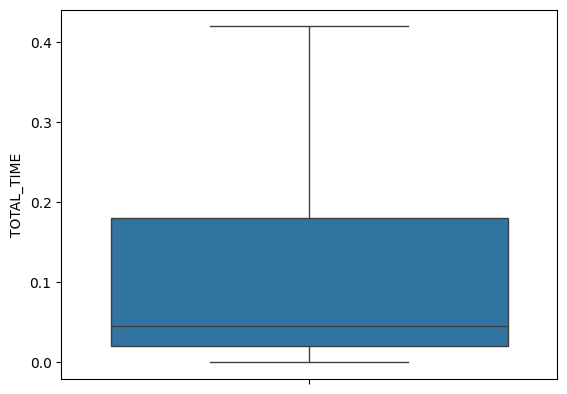

In [62]:
#capping: changing the outlier values to upper/lower limit values
X_train_nT = X_trainN_normalized.copy()
X_train_nT.loc[X_train_nT['TOTAL_TIME'] > upper_limit, 'TOTAL_TIME'] = upper_limit
X_train_nT.loc[X_train_nT['TOTAL_TIME'] < lower_limit, 'TOTAL_TIME'] = lower_limit
sns.boxplot(X_train_nT['TOTAL_TIME'])

In [63]:
X_train_nT.shape

(32, 4)

In [64]:
X_train_nT= X_train_nT.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)
X_train_nT.shape

(32, 1)

In [65]:
X_train_nT.head().round(2)

,TOTAL_TIME
0,0.42
1,0.02
2,0.02
3,0.11
4,0.34


In [66]:
X_trainN_normalized.shape

(32, 4)

In [67]:
X_trainN_normalized.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA
0,0.04,0.04,1.00,0.13
1,0.00,0.16,0.02,0.93
2,0.02,0.54,0.02,0.20
3,0.00,0.04,0.11,1.00
4,0.05,0.08,0.34,0.67


In [68]:
X_trainN_normalized= X_trainN_normalized.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'TOTAL_TIME'], axis=1)

In [69]:
X_trainN_normalized.head()

,LAMA_KERJA
0,0.13
1,0.93
2,0.20
3,1.00
4,0.67


In [70]:
#reuniting them to X_train
X_trainNum = pd.concat([X_train_nD, X_train_nP, X_train_nT, X_trainN_normalized], axis=1)

In [71]:
X_trainNum.shape

(32, 4)

In [72]:
X_trainNum.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA
0,0.04,0.04,0.42,0.13
1,0.00,0.16,0.02,0.93
2,0.02,0.54,0.02,0.20
3,0.00,0.04,0.11,1.00
4,0.05,0.08,0.34,0.67


#### X_train concat

In [75]:
X_train.shape

(32, 27)

In [74]:
X_train.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,...,GOL_B3,GOL_B3-MI,GOL_B4,GOL_C1,GOL_C2,GOL_C3,GOL_F2,LOKASI_Jakarta,LOKASI_Malang,LOKASI_Malang Madani
28,45.0,3.0,20700.0,3,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,3.0,9.0,407.0,15,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,23.0,28.0,468.0,4,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36,3.0,3.0,2352.0,16,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22,52.0,5.0,7052.0,11,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
X_train= X_train.copy()

In [77]:
X_train= X_train.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'TOTAL_TIME', 'LAMA_KERJA'], axis=1)

In [78]:
X_train.head()

,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,DIVISI_DMS,DIVISI_DSO,GOL_A3,GOL_B1,...,GOL_B3,GOL_B3-MI,GOL_B4,GOL_C1,GOL_C2,GOL_C3,GOL_F2,LOKASI_Jakarta,LOKASI_Malang,LOKASI_Malang Madani
28,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
#combining the final X_train

#checking the indices
print(X_trainNum.index)
print(X_train.index)

RangeIndex(start=0, stop=32, step=1)
Index([28,  7, 33, 36, 22, 18, 37,  5, 13,  1, 26, 12, 29,  9, 27, 11,  4, 35,
       38, 16, 17, 31, 14, 32,  2, 30, 10, 15, 23,  3, 24,  8],
      dtype='int64')


In [80]:
#reset indices
X_trainNum = X_trainNum.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)

In [81]:
#concating
X_train = pd.concat([X_trainNum, X_train], axis=1)

In [82]:
X_train.shape

(32, 27)

In [83]:
X_train.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,...,GOL_B3,GOL_B3-MI,GOL_B4,GOL_C1,GOL_C2,GOL_C3,GOL_F2,LOKASI_Jakarta,LOKASI_Malang,LOKASI_Malang Madani
0,0.04,0.04,0.42,0.13,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.00,0.16,0.02,0.93,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.02,0.54,0.02,0.20,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.00,0.04,0.11,1.00,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.05,0.08,0.34,0.67,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Data Model & Eval

## TIPE KEAHLIAN 

### DecisionTreeClassifier

In [84]:
dt = tree.DecisionTreeClassifier()

In [85]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
y_pred = dt.predict(X_test)
y_pred

array(['Perekayasa', 'Perekayasa', 'Perekayasa', 'Perekayasa',
       'Perekayasa', 'Perekayasa', 'Perekayasa', 'Perekayasa'],
      dtype=object)

In [88]:
y_test

27    Perekayasa
8     Perekayasa
29    Perekayasa
0     Perekayasa
52    Perekayasa
34    Perekayasa
62    Perekayasa
30    Perekayasa
Name: TIPE KEAHLIAN, dtype: object

In [89]:
dt.score(X_test,y_test)

1.0

In [92]:
cm= confusion_matrix(y_test, y_pred)
cm

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[8]], dtype=int64)

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Perekayasa       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

